In [1]:
import json
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from matplotlib.colors import ListedColormap
import json
from tqdm import tqdm
from pandas import json_normalize

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
TEST_JSON_PATH = '/content/drive/MyDrive/Colab Notebooks/TEST_DATA_SET/label (라벨링)/'

TEST_IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/TEST_DATA_SET/'

PREPROC_TEST_IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/myData/preprocessed/test/'

CSV_PATH = '/content/drive/MyDrive/Colab Notebooks/myData/'

In [4]:
with open (TEST_JSON_PATH + "test_anger.json", "r", encoding='euc-kr') as f:
    test_data_anger = json.load(f)

In [5]:
with open (TEST_JSON_PATH + "test_sadness.json", "r", encoding='euc-kr') as f:
    test_data_sadness = json.load(f)

In [6]:
with open (TEST_JSON_PATH + "test_panic.json", "r", encoding='euc-kr') as f:
    test_data_panic = json.load(f)

In [7]:
with open (TEST_JSON_PATH + "test_happy.json", "r", encoding='euc-kr') as f:
    test_data_happy = json.load(f)

In [8]:
json_to_csv_a = json_normalize(test_data_anger)
json_to_csv_a

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,q347e9fe539cb67cc112ec595fa351e0ae0ab1e57027fb...,여,30,전문인,분노,공공시설/종교/의료시설,2421.475297,1753.334270,1537.941485,581.617503,...,1531.399489,571.454763,불안,공공시설/종교/의료,2432.745002,1758.450706,1525.155363,581.999012,분노,공공시설/종교/의료
1,n8k53439edaa3fd087cd64e0cdffb51b3ed78af9476c79...,남,40,일반인,분노,교통/이동수단(엘리베이터 포함),1938.680372,1665.224307,1097.514219,537.032663,...,1097.663200,500.566000,분노,도심 환경,1940.666988,1664.603539,1105.830977,500.653567,분노,도심 환경
2,zm6t9255f092886de2c9bc8819c55cee98d28c1a36500e...,남,30,전문인,분노,실외 자연환경,1625.118800,1764.303500,799.864300,703.510740,...,843.673557,703.690755,분노,실외 자연환경,1625.118800,1790.970381,799.864300,703.644820,분노,실외 자연환경
3,xdq10b215a7aabf82c30cb477cdd4823e8c1baa4838201...,남,20,일반인,분노,교통/이동수단(엘리베이터 포함),2931.963057,1391.592200,2204.936357,521.105650,...,2191.134733,504.380328,분노,교통/이동수단(엘리베이터 포함),2913.963000,1391.592200,2186.936300,521.105650,분노,교통/이동수단(엘리베이터 포함)
4,o312ddd59e8f15955220465e825529352f6d1ed1b50513...,여,30,전문인,분노,행사/사무공간,2030.976186,1514.668773,1243.775378,427.951727,...,1242.267778,434.353368,당황,행사/사무공간,2035.625614,1513.264034,1245.466727,427.996466,분노,행사/사무공간
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,uwx0285f292609be9a6b900f7011c2a19ba11b9b134903...,남,20,일반인,분노,숙박 및 거주공간,2322.882800,1973.752400,1473.145100,898.931950,...,1490.640567,899.027145,분노,공공시설/종교/의료,2322.882800,1973.752400,1473.145100,898.931950,분노,공공시설/종교/의료
276,f6eq62b225a91206d470b45f54db29a19132d572f0f424...,남,30,전문인,분노,상업시설/점포/시장,1552.106663,1265.537541,951.965263,543.415748,...,946.809270,595.361579,분노,상업시설/점포/시장,1537.118682,1243.527722,943.969068,412.885148,분노,상업시설/점포/시장
277,ou4k7260db4606ab2d9d1fabc0465e4a2fe335d27a0060...,여,20,일반인,분노,숙박 및 거주공간,1499.498634,1332.257938,601.708034,205.845758,...,593.935034,219.681758,분노,숙박 및 거주공간,1508.451634,1346.139938,595.223034,213.656758,분노,숙박 및 거주공간
278,ukcud12e88bddb1b23ae550da52e62d360f1050368d390...,여,20,일반인,분노,상업시설/점포/시장,2077.280708,1519.706422,1064.143093,157.504587,...,1021.574286,259.669725,중립,상업시설/점포/시장,2040.766452,1551.357319,1040.552167,212.809348,분노,상업시설/점포/시장


In [9]:
json_to_csv_s = json_normalize(test_data_sadness)
json_to_csv_s

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,6v8555554d550ece347361d2c2bdcc0d145bdb4c273674...,여,30,전문인,슬픔,상업시설/점포/시장,1934.862700,1523.408300,1046.150600,238.128130,...,1046.185955,238.095462,불안,상업시설/점포/시장,1950.626800,1507.550780,1046.220505,214.404600,슬픔,상업시설/점포/시장
1,xlq3927d22f7781ab1afcc92dd3f0dd963210f2192a7a8...,남,20,일반인,슬픔,숙박 및 거주공간,1704.745854,1304.808641,978.068203,334.984741,...,978.923203,333.767741,슬픔,숙박 및 거주공간,1691.498853,1302.991641,981.431204,333.257741,슬픔,숙박 및 거주공간
2,g4d3d2bb951fbbd9c5971d218b6cdb4863872b33820d1f...,여,20,일반인,슬픔,상업시설/점포/시장,1005.221500,1380.389900,258.856260,474.246120,...,232.700785,386.006597,슬픔,상업시설/점포/시장,1005.221500,1380.389900,258.856260,474.246120,슬픔,상업시설/점포/시장
3,0hjp0ed05edcce6560cb5aca50ed588a9030a3deae64ad...,남,10,일반인,슬픔,숙박 및 거주공간,2073.403000,1506.980800,1269.285600,542.780000,...,1291.159018,546.424939,슬픔,숙박 및 거주공간,2073.403000,1506.980800,1269.285600,542.780000,슬픔,실외 자연환경
4,ifea34779bc9499b4f097bb10954a5b7c7bb022a0c4d9d...,여,20,일반인,슬픔,도심 환경,1993.614700,1463.019800,1208.832800,497.426820,...,1208.832800,497.426820,슬픔,숙박 및 거주공간,1993.907747,1448.616415,1256.789753,497.355205,중립,도심 환경
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,10vt463ed323acd213fd562fc226d0f8523af0a9ff298f...,여,30,일반인,슬픔,실외 자연환경,2023.913100,1603.097700,1409.572300,858.845640,...,1409.655126,759.056956,상처,실외 자연환경,2023.913100,1603.097700,1409.572300,858.845640,슬픔,실외 자연환경
280,7khz65e33a9eb7303e38271d4d3e255353e32d75bf3a28...,여,20,일반인,슬픔,상업시설/점포/시장,2162.161376,1425.240224,1345.252024,289.722454,...,1339.063291,291.563533,상처,상업시설/점포/시장,2161.975668,1430.327552,1334.961981,304.757071,슬픔,상업시설/점포/시장
281,ksfre7346a94a5a5cac4882898bc267022cab8292a8c85...,남,20,일반인,슬픔,교통/이동수단(엘리베이터 포함),2565.379400,1616.893400,1819.647700,718.261600,...,1839.923378,814.003484,슬픔,실외 자연환경,2565.379400,1616.893400,1819.647700,718.261600,슬픔,실외 자연환경
282,ui3p18b12185fffde528c2a2fc801372b1e8e8f7a3727f...,여,20,일반인,슬픔,숙박 및 거주공간,1634.981738,1252.098923,913.496478,179.183025,...,901.969733,174.593064,슬픔,숙박 및 거주공간,1647.465116,1264.057944,901.463171,164.588335,슬픔,숙박 및 거주공간


In [10]:
json_to_csv_p = json_normalize(test_data_panic)
json_to_csv_p

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,9efc20ce96215cc3ff9e631e157c4269e3c1c25ec0c588...,여,30,일반인,당황,도심 환경,2105.169200,1805.651700,1271.798200,709.713870,...,1271.798200,709.713870,상처,도심 환경,2105.169200,1805.651700,1271.798200,709.713870,당황,숙박 및 거주공간
1,yff37ec4bfa2dd6839c132972e918a7dbbf7c0a716b896...,여,30,일반인,당황,숙박 및 거주공간,1667.136400,983.206050,903.462160,0.000000,...,937.789921,0.000000,당황,숙박 및 거주공간,1667.136400,983.206050,903.462160,0.000000,당황,숙박 및 거주공간
2,zoza676dfbeabdedf68d204bd2d5d2de8dbb06d796e888...,여,30,전문인,당황,스포츠 관람 및 레저시설,1683.060500,1825.363600,736.699100,376.886470,...,754.954061,398.128668,당황,스포츠 관람 및 레저시설,1683.060500,1825.363600,736.699100,376.886470,당황,스포츠 관람 및 레저시설
3,lzpp3ea04aedfff4548965a4c318e18a27cbd27a5d6e6c...,남,30,전문인,당황,교통/이동수단(엘리베이터 포함),1479.847200,1153.037400,948.845340,501.179900,...,948.845340,514.037176,당황,교통/이동수단(엘리베이터 포함),1490.563130,1150.213186,940.832225,468.878235,당황,교통/이동수단(엘리베이터 포함)
4,1o1y8a4db2e372f666576f66bda84000d027333872042d...,여,40,전문인,당황,교통/이동수단(엘리베이터 포함),1670.809000,1655.828700,774.885860,308.776800,...,800.054985,312.925738,당황,행사/사무공간,1670.893470,1639.368217,797.902385,308.736572,중립,공공시설/종교/의료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,56nk8337bca641b268f8475b4eff2f1e4c6ef8ef7e1871...,남,20,일반인,당황,실외 자연환경,1232.617364,1441.339587,344.070494,291.781070,...,340.916021,318.938850,당황,오락/공연시설,1203.986900,1420.980200,315.440030,299.862950,당황,공공시설/종교/의료
271,8pvx7a67a88f83a395d8b98a5ee52ce0d88cdecf75ef5d...,여,30,일반인,당황,교통/이동수단(엘리베이터 포함),1530.711533,1365.197217,742.854983,288.334517,...,746.798825,316.551534,당황,교통/이동수단(엘리베이터 포함),1537.442666,1373.903413,749.586116,297.040713,당황,교통/이동수단(엘리베이터 포함)
272,ra83573dbf40d747fd67bdd447711fd4b77bf43d93b03d...,남,30,전문인,당황,스포츠 관람 및 레저시설,1647.449700,1236.209600,1098.983900,492.048900,...,1124.268362,508.011917,상처,스포츠 관람 및 레저시설,1647.449700,1236.209600,1098.983900,492.048900,당황,스포츠 관람 및 레저시설
273,vh3ua200008c3a454ee6b7aa05d636155e0a2c3b0c326b...,남,30,일반인,당황,교통/이동수단(엘리베이터 포함),2329.130344,1684.886418,1323.922144,393.215548,...,1340.466983,366.818800,당황,도심 환경,2341.583791,1703.049243,1336.375591,411.378373,당황,행사/사무공간


In [11]:
json_to_csv_h = json_normalize(test_data_happy)
json_to_csv_h

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A.boxes.maxX,annot_A.boxes.maxY,annot_A.boxes.minX,annot_A.boxes.minY,...,annot_B.boxes.minX,annot_B.boxes.minY,annot_B.faceExp,annot_B.bg,annot_C.boxes.maxX,annot_C.boxes.maxY,annot_C.boxes.minX,annot_C.boxes.minY,annot_C.faceExp,annot_C.bg
0,sczhaaba375db745e235b22ae0ab258add024a82456ea9...,남,30,전문인,기쁨,오락/공연시설,1871.453500,1893.651500,830.168900,501.020870,...,891.495899,501.221690,기쁨,오락/공연시설,1887.496327,1980.676817,893.431782,517.082449,기쁨,상업시설/점포/시장
1,d61b74c4c57cc88d011bca78f4239673cbb47484b17d8a...,남,20,일반인,기쁨,숙박 및 거주공간,1850.643300,1568.591700,915.693700,420.645750,...,964.357317,420.645750,기쁨,숙박 및 거주공간,1854.889310,1606.124563,932.398557,420.782251,기쁨,숙박 및 거주공간
2,mvut5c2503dff0127202efd2d0ee11b55990f0f74c0689...,여,20,일반인,기쁨,도심 환경,1887.601100,1681.480800,1016.156430,580.917500,...,1016.124615,574.832951,기쁨,실외 자연환경,1887.601100,1700.315251,1016.156430,536.731359,기쁨,숙박 및 거주공간
3,u7g6433c6735ff35c2035b8f7437798514f0133b7ec2eb...,남,20,일반인,기쁨,도심 환경,3147.717406,1905.509237,1973.137687,393.411675,...,2050.508009,345.477208,기쁨,공공시설/종교/의료,3111.585916,1926.243064,2059.855409,361.483446,기쁨,숙박 및 거주공간
4,6ivdbc0cc9433d5649c0921cd05d22670b2cd9240dd399...,여,30,전문인,기쁨,상업시설/점포/시장,1902.239900,1575.612200,933.653300,309.673280,...,933.653300,309.673280,기쁨,상업시설/점포/시장,1902.239900,1575.612200,933.653300,309.673280,기쁨,상업시설/점포/시장
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,832n41442520c530a7bead0644d75b7d07107f36e23d7f...,남,30,전문인,기쁨,교통/이동수단(엘리베이터 포함),1921.253286,1673.230404,1220.825314,607.406956,...,1236.592700,607.345931,기쁨,도심 환경,1921.325900,1616.384300,1236.592700,607.229060,기쁨,도심 환경
294,xjvy7a249889480ce826b22e8249d9034f23b8c1242c06...,남,20,일반인,기쁨,상업시설/점포/시장,2313.928924,1636.918614,1484.812676,551.815386,...,1499.300286,678.765203,기쁨,공공시설/종교/의료,2317.007148,1659.775618,1494.252633,568.522018,기쁨,공공시설/종교/의료
295,pv1b76006bae59676e720d90d60e36ed0759215e92255f...,여,30,전문인,기쁨,스포츠 관람 및 레저시설,2159.253000,1641.394400,1379.372800,495.262940,...,1370.428311,495.295289,기쁨,실외 자연환경,2159.253000,1641.394400,1379.372800,495.262940,기쁨,실외 자연환경
296,pn665886474bd146cdc417ed31c070040073ecd90c4c8b...,남,40,전문인,기쁨,오락/공연시설,952.256040,843.968570,452.596300,160.913210,...,453.884271,171.253197,기쁨,오락/공연시설,952.256040,843.968570,452.596300,160.913210,기쁨,상업시설/점포/시장


In [12]:
df = pd.concat([json_to_csv_a, json_to_csv_s, json_to_csv_p, json_to_csv_h], ignore_index=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1137 non-null   object 
 1   gender              1137 non-null   object 
 2   age                 1137 non-null   int64  
 3   isProf              1137 non-null   object 
 4   faceExp_uploader    1137 non-null   object 
 5   bg_uploader         1137 non-null   object 
 6   annot_A.boxes.maxX  1137 non-null   float64
 7   annot_A.boxes.maxY  1137 non-null   float64
 8   annot_A.boxes.minX  1137 non-null   float64
 9   annot_A.boxes.minY  1137 non-null   float64
 10  annot_A.faceExp     1137 non-null   object 
 11  annot_A.bg          1137 non-null   object 
 12  annot_B.boxes.maxX  1137 non-null   float64
 13  annot_B.boxes.maxY  1137 non-null   float64
 14  annot_B.boxes.minX  1137 non-null   float64
 15  annot_B.boxes.minY  1137 non-null   float64
 16  annot_

In [14]:
df_label = df.copy()

In [15]:
emotion = {'기쁨':0, '분노':1, '슬픔':2, '당황':3}

In [16]:
df_label['faceExp_uploader'] = df['faceExp_uploader'].map(emotion)

In [17]:
df_coordi = df_label.copy()

In [18]:
box_cols_minX = ['annot_A.boxes.minX', 'annot_B.boxes.minX', 'annot_C.boxes.minX']
box_cols_maxX = ['annot_A.boxes.maxX', 'annot_B.boxes.maxX', 'annot_C.boxes.maxX']
box_cols_minY = ['annot_A.boxes.minY', 'annot_B.boxes.minY', 'annot_C.boxes.minY']
box_cols_maxY = ['annot_A.boxes.maxY', 'annot_B.boxes.maxY', 'annot_C.boxes.maxY']

In [19]:
df_coordi['minX'] = df_coordi[box_cols_minX].median(axis=1)
df_coordi['maxX'] = df_coordi[box_cols_maxX].median(axis=1)
df_coordi['minY'] = df_coordi[box_cols_minY].median(axis=1)
df_coordi['maxY'] = df_coordi[box_cols_maxY].median(axis=1)

In [20]:
cols = ['filename', 'faceExp_uploader','minY', 'maxY', 'minX', 'maxX']

In [21]:
df_fin = df_coordi[cols]

In [22]:
df_fin.describe()

,faceExp_uploader,minY,maxY,minX,maxX
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,1.471416,467.397322,1575.069609,1176.556492,1995.168805
std,1.121697,222.040091,376.656402,483.446955,586.130898
min,0.000000,-7.326409,486.439386,58.710346,553.342943
25%,0.000000,314.767000,1368.716739,889.140464,1649.455100
50%,1.000000,450.830165,1576.310500,1143.164414,1954.408200
75%,2.000000,596.784800,1770.739900,1445.918700,2305.897559
max,3.000000,1505.722033,4075.487290,4368.234906,6387.848306


In [23]:
box_cols = ['minY','maxY','minX','maxX']

In [24]:
for col in box_cols:
    df_fin.loc[df_fin[col] < 0,col]=0

In [25]:
df_strange = df_fin[(df_fin['minX']<=0) | (df_fin['minY']<=0) | (df_fin['maxX']<50) | (df_fin['maxY']<50) | (df_fin['maxX']-df_fin['minX']<50) | (df_fin['maxY']-df_fin['minY']<100)][cols]

In [26]:
len(df_strange)

8

In [27]:
df_fin.describe()

,faceExp_uploader,minY,maxY,minX,maxX
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,1.471416,467.403765,1575.069609,1176.556492,1995.168805
std,1.121697,222.026408,376.656402,483.446955,586.130898
min,0.000000,0.000000,486.439386,58.710346,553.342943
25%,0.000000,314.767000,1368.716739,889.140464,1649.455100
50%,1.000000,450.830165,1576.310500,1143.164414,1954.408200
75%,2.000000,596.784800,1770.739900,1445.918700,2305.897559
max,3.000000,1505.722033,4075.487290,4368.234906,6387.848306


In [30]:
df_strange

,filename,faceExp_uploader,minY,maxY,minX,maxX
148,stwqfff0a1f114d3475946c1d4b321d5df08776b1d6263...,1,0.0,1215.665570,363.300267,1262.146547
393,769l3b7398f281235d223c9687e5273e54728c8125b758...,2,0.0,1556.415237,864.982240,2076.470700
489,bqhbc0b4485091edeecb2bd9e82426fc149e5a0bed45b6...,2,0.0,1279.599000,1523.331700,2364.141000
565,yff37ec4bfa2dd6839c132972e918a7dbbf7c0a716b896...,3,0.0,983.206050,903.462160,1667.136400
595,670475cb2c927772277b648092abb774a24c517696a65f...,3,0.0,1294.760700,1409.730700,2500.767800
989,d5vj722896514c1fa032828216f7c52e33096c6580055d...,0,0.0,1123.954000,351.132200,1194.416500
1012,qs4456e69947f9749c6e61e84f93ea6e35bcf0fb0ffe45...,0,0.0,1409.425357,899.409300,1830.424500
1096,yigce3ed9432122d525565af3fbeb4e3f903b5dc03b08d...,0,0.0,919.520700,1020.823060,1742.681400


<ipython-input-31-daf1fdd9d957>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(12,12,index)


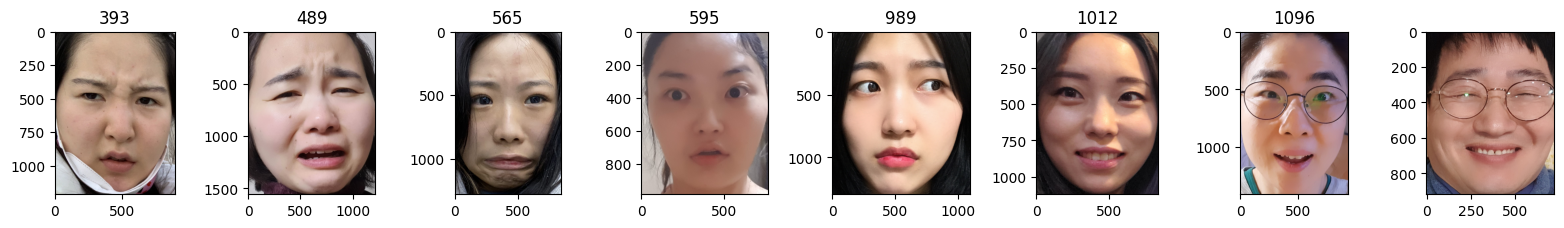

In [31]:
fig = plt.figure(figsize = (30,30))
index = 1
for i in df_strange.index:
    emotion = ""
    if df_strange['faceExp_uploader'][i] == 0:
        emotion += '2. happy'
    elif df_strange['faceExp_uploader'][i] == 1:
        emotion += '1. anger'
    elif df_strange['faceExp_uploader'][i] == 2:
        emotion += '4. sadness'
    elif df_strange['faceExp_uploader'][i] == 3:
        emotion += '3. panic'
    img = cv2.imread(TEST_IMG_PATH + emotion + '/' + df_strange['filename'][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.gca().set_title(i)
    plt.subplot(12,12,index)
    plt.imshow(img[int(df_strange['minY'][i]):int(df_strange['maxY'][i]), int(df_strange['minX'][i]):int(df_strange['maxX'][i])])
    index += 1

In [32]:
df_fin.to_csv(CSV_PATH + 'test.csv')

In [33]:
fault_list=[]

In [34]:
filenames = list(df_fin['filename'])
emotions = list(df_fin['faceExp_uploader'])

In [43]:
def crop_images(filepath, coordinates, emotion): # coordinates = (df['annot_A.boxes.minX'][i], df['annot_A.boxes.minY'][i], df['annot_A.boxes.maxX'][i], df['annot_A.boxes.maxY'][i])
    img = cv2.imread(filepath)
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    for c in coordinates:
      if c < 0:
        fault_list.append((filepath.split('/')[-1], emotion))
        print(filepath.split('/')[-1])
        del img
        return None
    a=int(coordinates[0])
    b=int(coordinates[1])
    c=int(coordinates[2])
    d=int(coordinates[3])
    croped_img = img[a:b, c:d]
    del img

    return croped_img

In [44]:
# All files crop
for i in tqdm(range(0, len(filenames), 3)):
    save_path = PREPROC_TEST_IMG_PATH
    emotion=''
    if emotions[i] == 0:
        emotion += '2. happy'
    elif emotions[i] == 1:
        emotion += '1. anger'
    elif emotions[i] == 2:
        emotion += '4. sadness'
    elif emotions[i] == 3:
        emotion += '3. panic'
    else:
        print('NOT SUPPORTED EMOTION')
        continue

    coordinate = (df_fin['minY'][i], df_fin['maxY'][i], df_fin['minX'][i], df_fin['maxX'][i])
    # print(filenames[i])
    croped_img = crop_images(TEST_IMG_PATH + emotion + '/' + filenames[i], coordinate, emotion)
    if croped_img is None:
      continue
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    save_path += 'crop/'
    os.makedirs(save_path, exist_ok=True)
    save_path += emotion.split()[-1] + '/'
    os.makedirs(save_path, exist_ok=True)
    cv2.imwrite(save_path + filenames[i], croped_img)
    # print(filenames[i])
    del croped_img
    del save_path

100%|██████████| 379/379 [11:06<00:00,  1.76s/it]
